In [34]:
import pandas as pd
import empath
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
conspiracy_file = open("conspiracy_submissions_wordlist.txt", "r")
conspiracy_words = conspiracy_file.read().split("\n")

science_file = open("science_submissions_wordlist.txt", "r")
science_words = science_file.read().split("\n")

In [46]:
def plotHotTopics(words):
    lexicon = empath.Empath()
    empath_results = lexicon.analyze(words, normalize=True)
    empath_results_sorted = sorted(empath_results.items(), key=lambda x: x[1], reverse=True)

    plt.figure(figsize = (14, 14))

    top_ten = dict(list(empath_results_sorted)[:10])
    labels = list(top_ten.keys())
    values = list(top_ten.values())
    ax = sns.barplot(x=labels, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    plt.savefig("empath.png")
    return empath_results


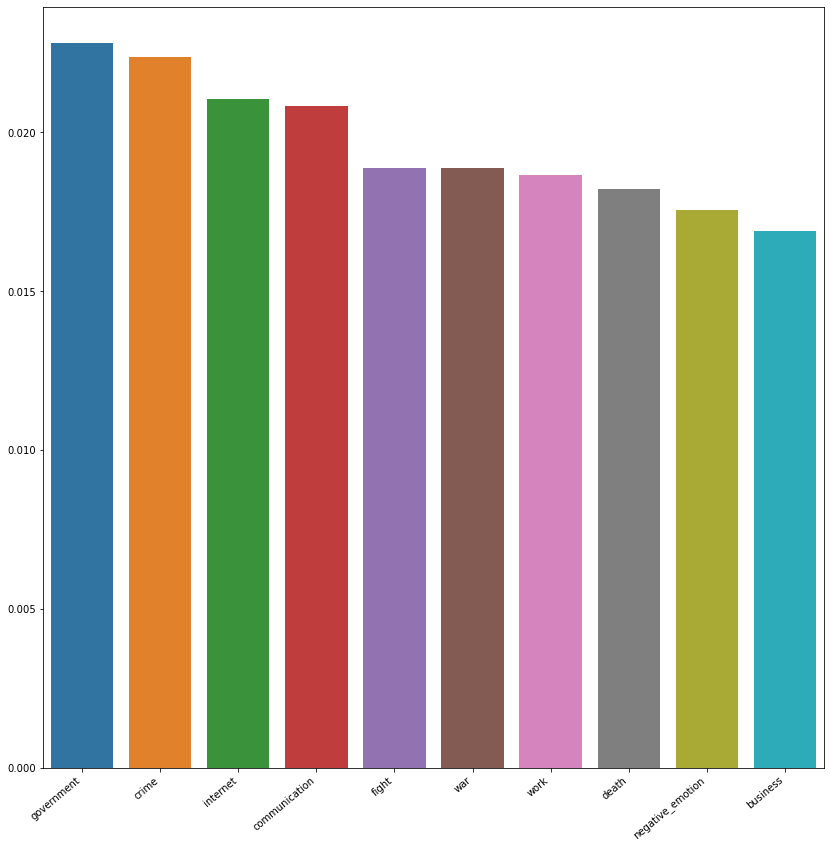

<Figure size 432x288 with 0 Axes>

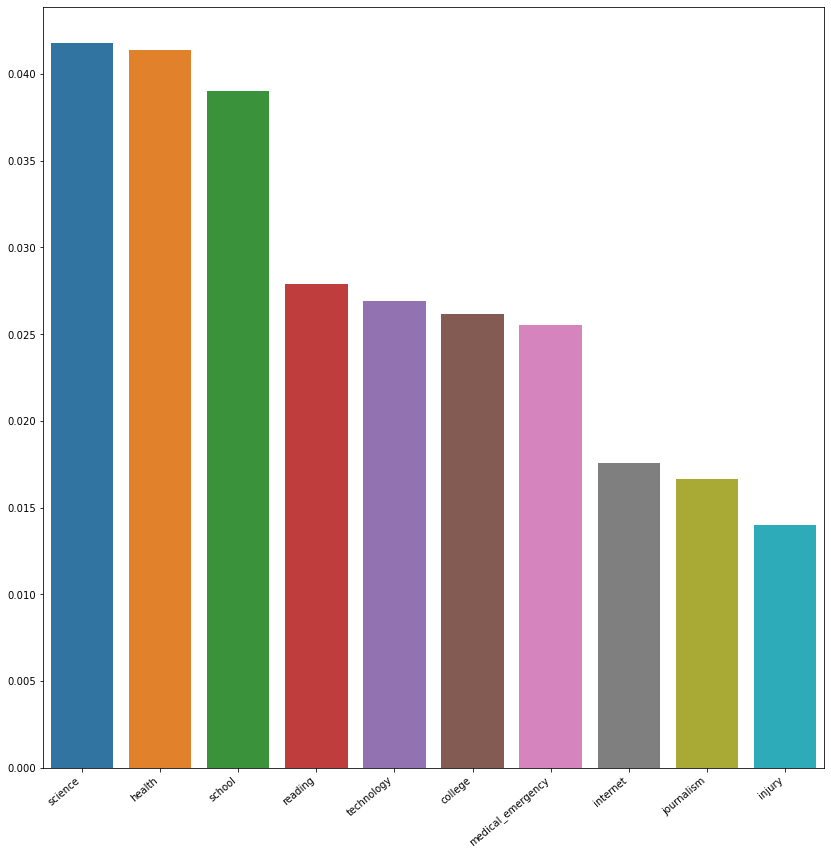

<Figure size 432x288 with 0 Axes>

In [47]:
conspiracy_empath = plotHotTopics(conspiracy_words)
science_empath = plotHotTopics(science_words)

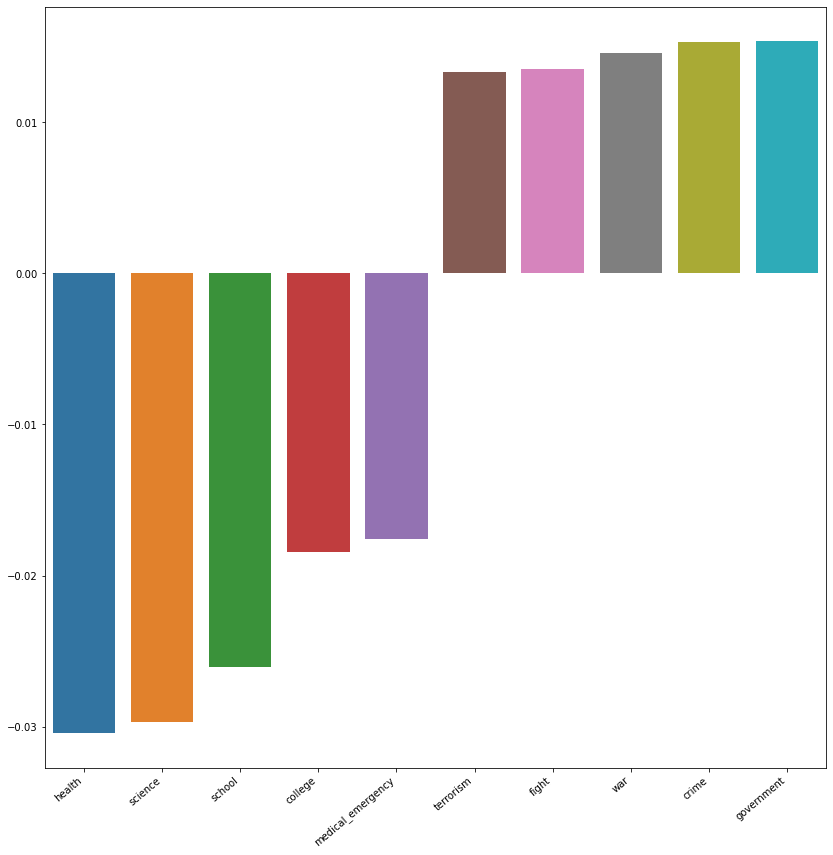

<Figure size 432x288 with 0 Axes>

In [53]:
differences = {}
for key in conspiracy_empath:
    differences[key] = conspiracy_empath[key] - science_empath[key]

differences_sorted = sorted(differences.items(), key=lambda x: x[1])

plt.figure(figsize = (14, 14))

top_ten = dict(list(differences_sorted)[:5] + list(differences_sorted[-5:]))
labels = list(top_ten.keys())
values = list(top_ten.values())
ax = sns.barplot(x=labels, y=values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
plt.savefig("empath.png")
